In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from ErrorCalculator import ErrorCalculator
from Plotter import Plotter
from ScatterPlotter import  ScatterPlotter
from sklearn.preprocessing import StandardScaler
import matplotlib

In [2]:
train_data = pd.read_csv('train_data.csv')
train_data.head()

,Unnamed: 0,salary,exprior,yearsworked,yearsrank,market,yearsabs,degree_yes degree,otherqual_yes other qual,position_Junior,position_Manager,male_male,Field_Finance,Field_Human Resources,Field_Marketing
0,419,34603.0,0,6,4,0.79,1,1,0,1,0,0,1,0,0
1,135,53543.0,9,4,4,1.17,1,1,0,0,1,1,0,0,0
2,386,33800.0,0,0,0,0.84,4,1,0,1,0,0,0,1,0
3,122,49667.0,0,12,4,0.88,0,1,0,0,1,1,1,0,0
4,22,34731.0,1,1,1,0.85,3,1,0,1,0,1,0,0,1


In [3]:
test_data = pd.read_csv('test_data.csv')
test_data.head()

,Unnamed: 0,salary,exprior,yearsworked,yearsrank,market,yearsabs,degree_yes degree,otherqual_yes other qual,position_Junior,position_Manager,male_male,Field_Finance,Field_Human Resources,Field_Marketing
0,283,62091.0,0,23,14,1.13,0,1,0,0,0,1,0,0,0
1,100,42482.0,0,9,4,0.99,0,1,0,0,1,1,0,0,1
2,37,46292.0,1,2,2,1.14,0,1,0,1,0,1,1,0,0
3,46,59110.0,0,4,4,1.33,0,1,0,1,0,1,0,0,0
4,375,89789.0,11,22,21,0.93,2,1,0,0,0,1,1,0,0


## The distribution of salary

Text(0.5, 0, 'salary')

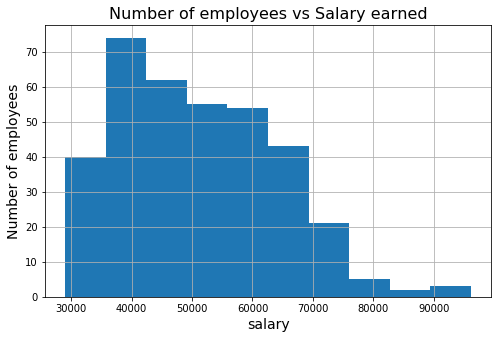

In [4]:
train_data.hist('salary',figsize=(8,5))
plt.title('Number of employees vs Salary earned',fontsize=16)
plt.ylabel('Number of employees',fontsize=14)
plt.xlabel("salary",fontsize=14)

## The distribution of log-transformed salary

In [5]:
train_data['log_salary'] = np.log(train_data['salary'])
test_data['log_salary'] =np.log(test_data['salary'])

Text(0.5, 0, 'salary')

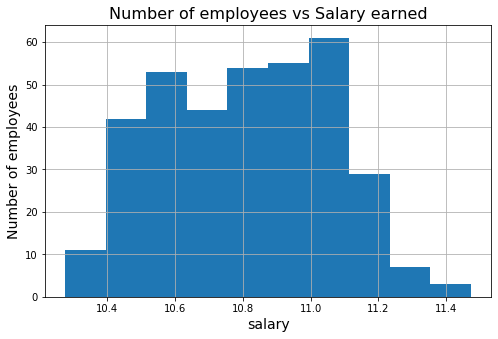

In [6]:
train_data.hist('log_salary',figsize=(8,5))
plt.title('Number of employees vs Salary earned',fontsize=16)
plt.ylabel('Number of employees',fontsize=14)
plt.xlabel("salary",fontsize=14)

## Scaling Features

In [7]:
y_train = train_data['salary']
y_test = test_data['salary']
y_trainlog = train_data['log_salary']
y_testlog = test_data['log_salary']
train_datamodel = train_data[['yearsrank','position_Junior','position_Manager']]
train_datamodel1 = train_data[['yearsrank','position_Junior','position_Manager']]
train_datamodel2 = train_data[['position_Junior','position_Manager']]

In [8]:
scaler = StandardScaler()
scaler.fit(train_datamodel1)
train_datamodel1 = scaler.transform(train_datamodel1)
train_datamodel1 = pd.DataFrame({'yearsrank':train_datamodel1[:,0],'position_Junior':train_datamodel1[:,1],
                                 'position_Manager':train_datamodel1[:,2]})

In [9]:
test_datamodel = test_data[['yearsrank','position_Junior','position_Manager']]
test_datamodel1 = test_data[['yearsrank','position_Junior','position_Manager']]
test_datamodel1 = sm.add_constant(test_datamodel1)
test_datamodel2 = test_data[['position_Junior','position_Manager']]

/home/olebogeng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
scaler = StandardScaler()
scaler.fit(test_datamodel1)
test_datamodel1 = scaler.transform(test_datamodel1)
test_datamodel1 = pd.DataFrame({'yearsrank':test_datamodel1[:,0],'position_Junior':test_datamodel1[:,1],
                                 'position_Manager':test_datamodel1[:,2]})

In [11]:
train_datamodel = sm.add_constant(train_datamodel)
model = sm.OLS(y_train,train_datamodel).fit()
model.save('model.pickle')

/home/olebogeng/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [12]:
train_datamodel1 = sm.add_constant(train_datamodel1)
model1 = sm.OLS(y_trainlog,train_datamodel1).fit()
model1.save('model1.pickle')

In [13]:
train_datamodel2 = sm.add_constant(train_datamodel2)
model2 = sm.OLS(y_trainlog,train_datamodel2).fit()
model2.save('model2.pickle')

In [14]:
test_datamodel = sm.add_constant(test_datamodel)
test_datamodel1 = sm.add_constant(test_datamodel1)
test_datamodel2 = sm.add_constant(test_datamodel2)
model_prediction  = model.predict(test_datamodel)
model1_prediction = model1.predict(test_datamodel1)
model2_prediction = model2.predict(test_datamodel2)

In [15]:
modelError = ErrorCalculator(y_test,model_prediction)
model1Error = ErrorCalculator(y_testlog,model1_prediction)
model2Error = ErrorCalculator(y_testlog,model2_prediction)
print('The RMSE of model is:',modelError.get_rmse())
print('The RMSE of model1 is:',model1Error.get_rmse())
print('The RMSE of model1 is:',model2Error.get_rmse())

The RMSE of model is: 8141.492924033082
The RMSE of model1 is: 0.31291533303084373
The RMSE of model1 is: 0.17478870720459333


## Diagnostic plots for model 1 and model 2

### Histogram of the Residual

The Histogram of the Residual can be used to check whether the variance is normally distributed. A symmetric bell-shaped histogram which is evenly distributed around zero indicates that the normality assumption is likely to be true. If the histogram indicates that random error is not normally distributed, it suggests that the model's underlying assumptions may have been violated.

In [16]:
plottermodel = Plotter(y_test,model_prediction)
plottermodel1 = Plotter(y_testlog,model1_prediction)
plottermodel2 = Plotter(y_testlog,model2_prediction)

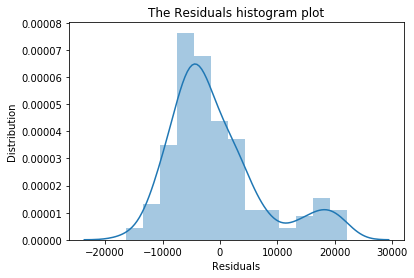

In [17]:
plottermodel.run_calculations()
plottermodel1.run_calculations()
plottermodel2.run_calculations()
plottermodel.plot()
plt.show()




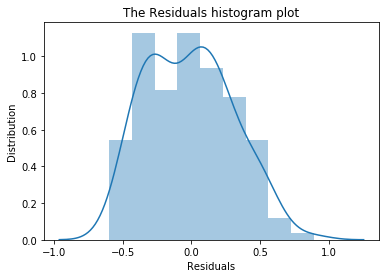

In [18]:
plottermodel1.plot()
plt.show()

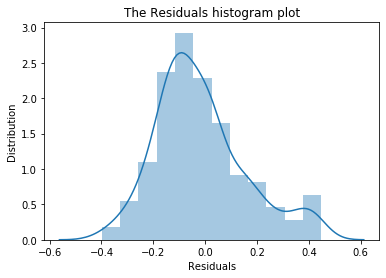

In [19]:
plottermodel2.plot()
plt.show()

Both model1 and model2 depict bimodal distribution.

### Scatterplots of the residual versus predicted values And Actual Values versus Predicted Values

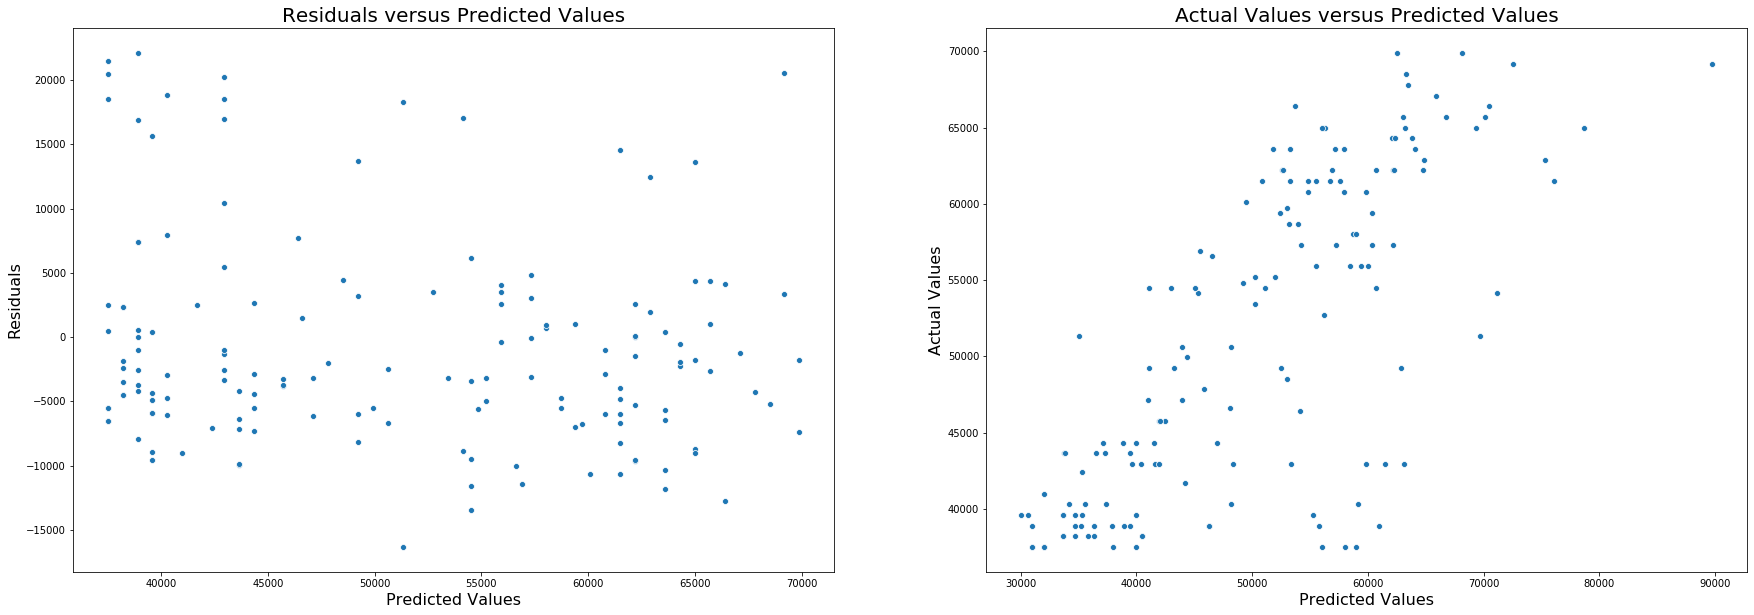

In [20]:
scatterplot =ScatterPlotter(y_test,model_prediction)
scatterplot.plot()


The scatterplot shows that residuals for the model 
are randomly scattered with no evident relationship. The plot shows that there is evident 
linear relationship between Actual values and Predicted values.

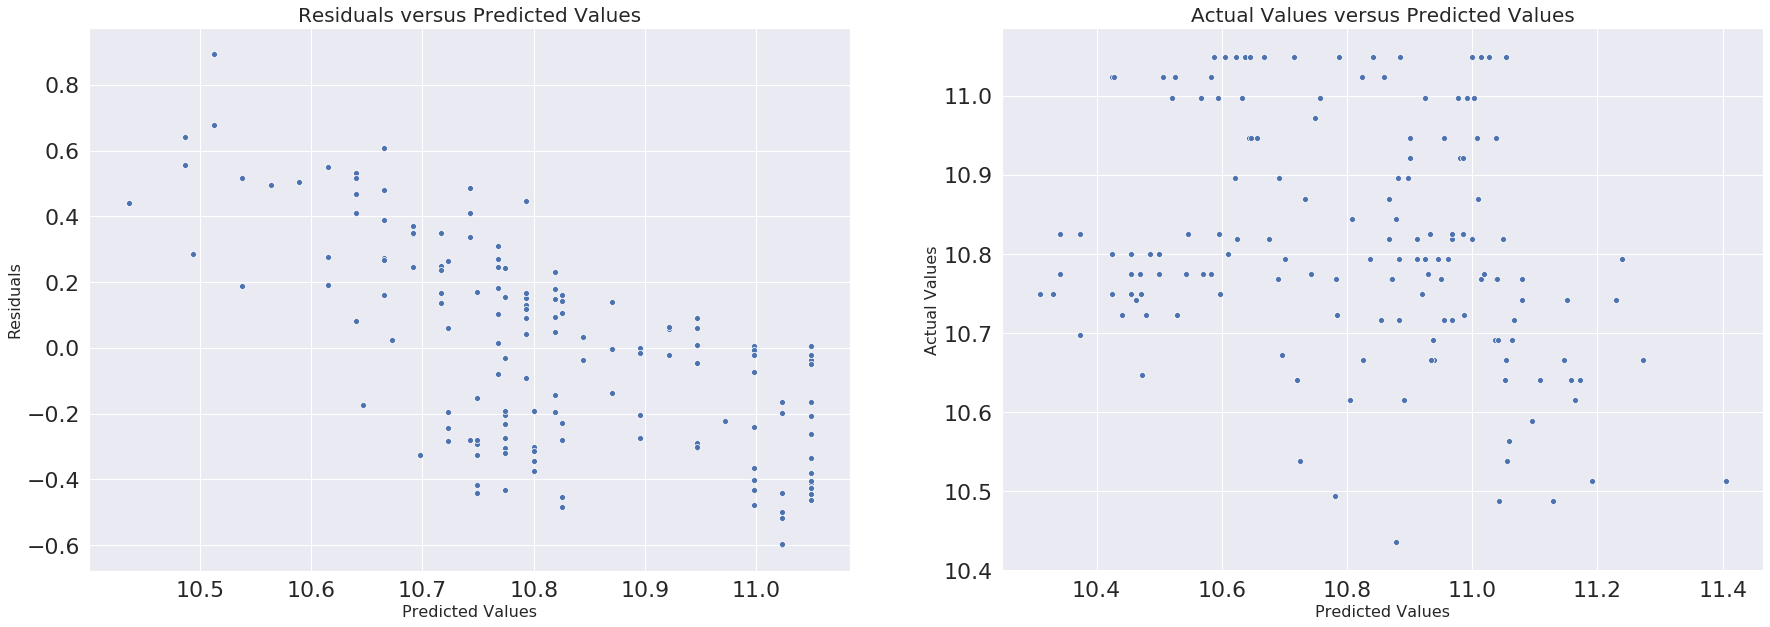

In [21]:
scatterplot1 = ScatterPlotter(y_testlog,model1_prediction)
scatterplot1.plot()

The scatterplot shows that residuals for the model 
are not randomly scattered and there is a linear relationship that is depicted. There is no evident relationship between the Actual values 
and Predicted values. 
With the two observations mentioned there might be a room of improvement on this model1. 

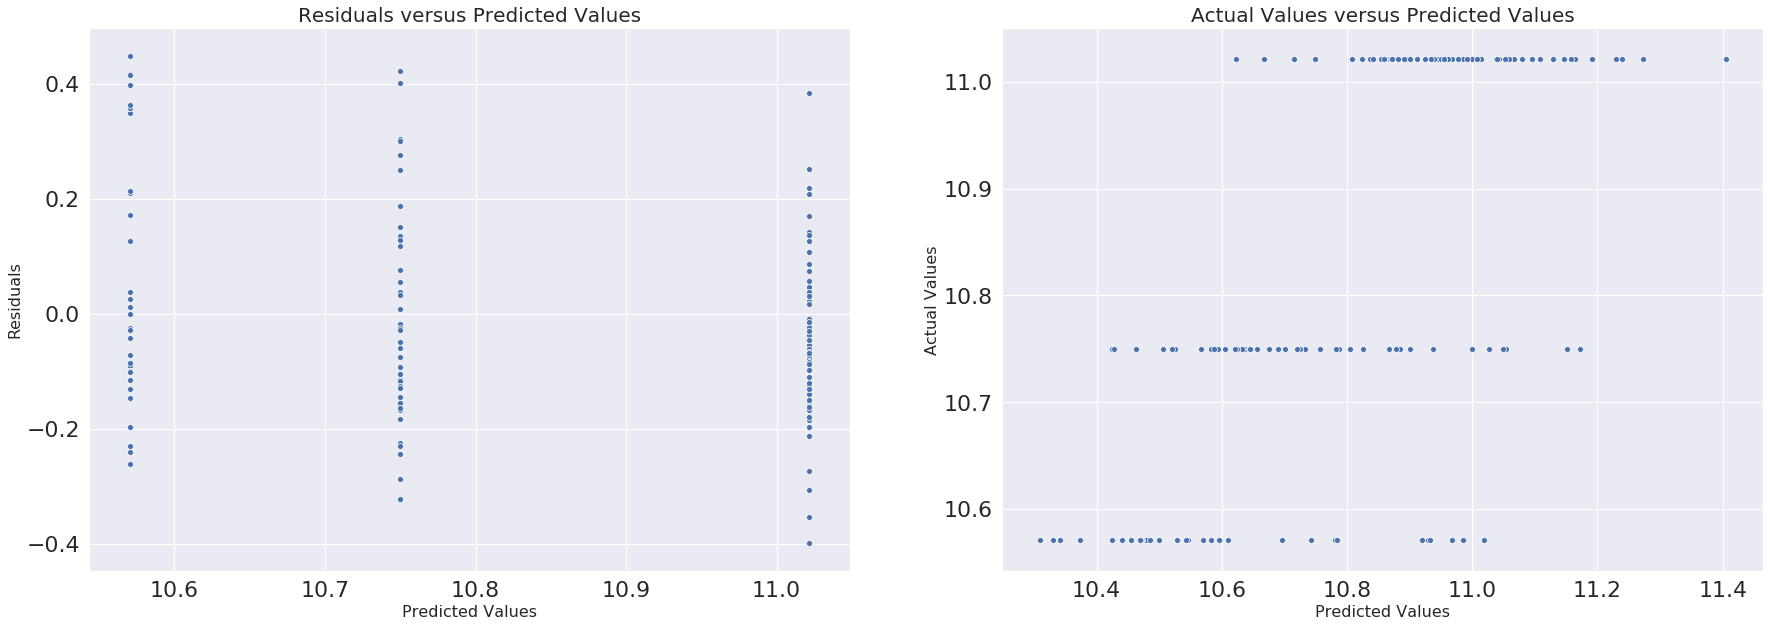

In [22]:
scatterplot2 = ScatterPlotter(y_testlog,model2_prediction)
scatterplot2.plot()


When the variable yearsrank is removed only categorical features are 
left hence the above relationship depicted. Since there is a form of a pattern it is safe to say that 
the model is not performing well and it best to keep the feature yearsrank.

## How does the model accuracy and diagnostics for the two models compare?

| Model name  | Description                                  | R-squared | Accuracy(RMSE)     |
| ----------  | -------------------------------------------  | --------- |------------------- |
| model       | Multivariate                                 | .619      | 8141.492924033082  |
| model1      | Multivariate with log-salary                 | .631      | 0.31291533303084373|
| model2      | Removed  yearsrank from the features         | .548      |0.17478870720459333 |

## Which is the better regression model?

When looking at R-squared the  log-transformed salary  model (model1) performes better than the initial model
in which the target feature is not log transformed. When the feature  yearsrank  is removed the model 
(model2) perfomes worse which shows that it is indeed a significant feature.
Looking at Residual and Predicted Values the original model performs better than model1 and model2.
It is much better to use the original model because the distribution of the target
did not change to be normaly distributed and the Residual plots showed that the original model performes better. 
